In [1]:
%load_ext cudf.pandas

## Loading and Transforming Data

Run once, transforms dataset for graph learning

In [2]:
output_path = "data/sensor_df.pkl"

In [3]:
# # Run once, do not delete!
# from utilities import SensorCyclePipeline

# input_path = "data/sensor.csv"

# pipeline = SensorCyclePipeline(input_path, output_path)
# pipeline.run()

In [4]:
import pandas as pd
df_sensor_raw = pd.read_pickle(output_path)
# Temporary
df_sensor_temp = df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
                           'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
                            #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
                               ]].copy()
df_sensor_temp

,timestamp,CycleID,machine_status,sensor_00_value_decimals,sensor_00_value,sensor_00_value_exp_weighted_mean_span10000,sensor_00_value_exp_weighted_std_span10000,sensor_00_value_zscore_span10000
0,2018-04-01 00:00:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
1,2018-04-01 00:01:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
2,2018-04-01 00:02:00,0,NORMAL,6.0,2.444734,NaN,NaN,NaN
3,2018-04-01 00:03:00,0,NORMAL,6.0,2.460474,NaN,NaN,NaN
4,2018-04-01 00:04:00,0,NORMAL,6.0,2.445718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,21,NORMAL,5.0,2.407350,2.437010,0.047856,-0.619769
220316,2018-08-31 23:56:00,21,NORMAL,6.0,2.400463,2.437002,0.047854,-0.763558
220317,2018-08-31 23:57:00,21,NORMAL,6.0,2.396528,2.436994,0.047853,-0.845642
220318,2018-08-31 23:58:00,21,NORMAL,6.0,2.406366,2.436988,0.047850,-0.639963


In [5]:
cycle_stats = df_sensor_raw.groupby('CycleID').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max'),
    duration_min=('timestamp', lambda x: (x.max() - x.min()).total_seconds() / 60),
    count=('timestamp', 'count'),
    status=('machine_status', 'first')
).reset_index()

# Save separately
cycle_stats.to_pickle("cycle_stats.pkl")

In [22]:
cycle_stats

,CycleID,start_time,end_time,duration_min,count,status
0,0,2018-04-01 00:00:00,2018-04-12 21:54:00,17154.0,17155,NORMAL
1,1,2018-04-12 21:55:00,2018-04-12 21:55:00,0.0,1,BROKEN
2,2,2018-04-12 21:56:00,2018-04-13 13:39:00,943.0,944,RECOVERING
3,3,2018-04-13 13:40:00,2018-04-18 00:29:00,6409.0,6410,NORMAL
4,4,2018-04-18 00:30:00,2018-04-18 00:30:00,0.0,1,BROKEN
5,5,2018-04-18 00:31:00,2018-04-20 04:20:00,3109.0,3110,RECOVERING
6,6,2018-04-20 04:21:00,2018-05-19 03:17:00,41696.0,41697,NORMAL
7,7,2018-05-19 03:18:00,2018-05-19 03:18:00,0.0,1,BROKEN
8,8,2018-05-19 03:19:00,2018-05-20 01:10:00,1311.0,1312,RECOVERING
9,9,2018-05-20 01:11:00,2018-05-25 00:29:00,7158.0,7159,NORMAL


In [25]:
mask_cycleids = cycle_stats[cycle_stats['status'] == 'BROKEN']['CycleID'].tolist()
print(f'"BROKEN" CycleIDs:{mask_cycleids})')
df_sensor_temp = df_sensor_temp[~df_sensor_temp['CycleID'].isin(mask_cycleids)]

# Merge end_time into df_sensor_temp and create df_sensor_temp2
df_sensor_temp2 = pd.merge(df_sensor_temp,
                           cycle_stats[['CycleID', 'end_time']],
                           on='CycleID',
                           how='left')

# Convert to datetime
df_sensor_temp2['timestamp'] = pd.to_datetime(df_sensor_temp2['timestamp'])
df_sensor_temp2['end_time'] = pd.to_datetime(df_sensor_temp2['end_time'])

# Add 1 minute to end_time
df_sensor_temp2['end_time_plus_1min'] = df_sensor_temp2['end_time'] + pd.Timedelta(minutes=1)

# Calculate time difference in minutes until state change
df_sensor_temp2['time_to_state_change_min'] = (
    df_sensor_temp2['end_time_plus_1min'] - df_sensor_temp2['timestamp']
).dt.total_seconds() / 60

# Drop the helper column if you want
df_sensor_temp2 = df_sensor_temp2.drop(columns=['end_time', 'end_time_plus_1min'])

df_sensor = df_sensor_temp2.copy()

"BROKEN" CycleIDs:[1, 4, 7, 10, 13, 16, 19])


In [26]:
df_sensor

,timestamp,CycleID,machine_status,sensor_00_value_decimals,sensor_00_value,sensor_00_value_exp_weighted_mean_span10000,sensor_00_value_exp_weighted_std_span10000,sensor_00_value_zscore_span10000,time_to_state_change_min
0,2018-04-01 00:00:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN,17155.0
1,2018-04-01 00:01:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN,17154.0
2,2018-04-01 00:02:00,0,NORMAL,6.0,2.444734,NaN,NaN,NaN,17153.0
3,2018-04-01 00:03:00,0,NORMAL,6.0,2.460474,NaN,NaN,NaN,17152.0
4,2018-04-01 00:04:00,0,NORMAL,6.0,2.445718,NaN,NaN,NaN,17151.0
...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,21,NORMAL,5.0,2.407350,2.437010,0.047856,-0.619769,5.0
220309,2018-08-31 23:56:00,21,NORMAL,6.0,2.400463,2.437002,0.047854,-0.763558,4.0
220310,2018-08-31 23:57:00,21,NORMAL,6.0,2.396528,2.436994,0.047853,-0.845642,3.0
220311,2018-08-31 23:58:00,21,NORMAL,6.0,2.406366,2.436988,0.047850,-0.639963,2.0


### Feature Engineering

Desire to have z-score for the decimals too

## Graph Construction

## Visualizations

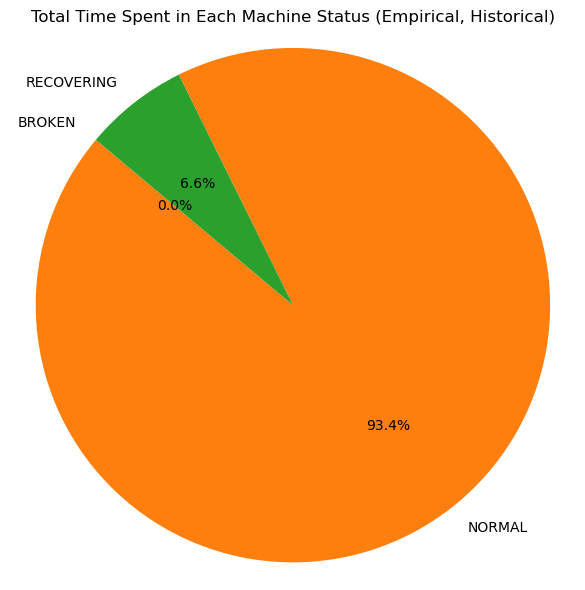

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cycle stats
cycle_stats = pd.read_pickle('cycle_stats.pkl')

# Group by status and sum durations
status_durations = cycle_stats.groupby('status')['count'].sum()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_durations, labels=status_durations.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Time Spent in Each Machine Status (Empirical, Historical)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()


In [15]:
import numpy as np

# Sort cycles
df = cycle_stats.sort_values('CycleID').reset_index(drop=True)

# Self transitions: same state repeats
self_df = df.copy()
self_df['next_status'] = self_df['status']
self_df['count'] = self_df['count'] - 1
self_df = self_df[self_df['count'] > 0]

# Next state transitions: different states
next_df = df.copy()
next_df['next_status'] = next_df['status'].shift(-1)
next_df['count'] = 1
next_df = next_df.dropna(subset=['next_status'])

# Combine both
transitions = pd.concat([self_df[['status','next_status','count']], next_df[['status','next_status','count']]])

# Get all unique states from status and next_status
states = sorted(set(transitions['status']).union(set(transitions['next_status'])))

# Group and sum counts
transition_matrix = transitions.groupby(['status','next_status'])['count'].sum().unstack(fill_value=0)

# Reindex rows and columns for consistent ordering
transition_matrix = transition_matrix.reindex(index=states, columns=states, fill_value=0)

print(transition_matrix)

# Convert counts to probabilities (rows sum to 1)
row_sums = transition_matrix.sum(axis=1).replace(0, 1)
transition_matrix = transition_matrix.div(row_sums, axis=0)

print("Transition matrix (probabilities):")
print(transition_matrix)

# Calculate steady state vector
# solve steady state: pi such that pi = pi * P, 
eigvals, eigvecs = np.linalg.eig(transition_matrix.T)

# Get eigenvector corresponding to eigenvalue 1
steady_vec = eigvecs[:, np.isclose(eigvals, 1)]

# Normalize steady state
steady_state = steady_vec[:, 0].real
steady_state /= steady_state.sum()

print(f"Steady state %: [{', '.join(f'{x:.3f}' for x in steady_state * 100)}]")


            BROKEN  NORMAL  RECOVERING
status                                
BROKEN           0       0           7
NORMAL           7  205828           0
RECOVERING       0       7       14470
Transition matrix (probabilities):
              BROKEN    NORMAL  RECOVERING
status                                    
BROKEN      0.000000  0.000000    1.000000
NORMAL      0.000034  0.999966    0.000000
RECOVERING  0.000000  0.000484    0.999516
Steady state %: [0.003, 93.426, 6.571]


### Observations

- 7 cycles of Normal to Broken
- 7 cycles of Recovering to Normal
- Long-term, the water pump is expected to operate in NORMAL machine status 90% of the time, and 10% of the time it is in RECOVERING status.
    - 90% availability is **great** for typical manufacturing, but for a small village relying on a ***single*** pump, it can have serious consequences.
    - Traditionally, adding a second village water pump mitigates downtime risk when the primary fails; in a critical supply setting, where significant downtime can cost lives, relying on just one machine is not only risky, it’s a fundamental systemic design flaw.
    - If adding a backup is infeasible, then implementing predictive maintenance becomes critical to ensure a reliable water supply.